In [85]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error

import seaborn as sns
import matplotlib as mlt


In [22]:
df = pd.read_csv("../50_Startups.csv")

df[df.columns] = df[df.columns].replace(0, np.nan)

In [23]:
df.isna().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [28]:
df.head()
df["State"].nunique()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        48 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  47 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [33]:
Y = df.iloc[:, -1]
X = df.iloc[:, 0:4]

In [36]:
Y = pd.DataFrame(Y, columns=["Profit"])


In [65]:
X.sample(10)

,R&D Spend,Administration,Marketing Spend,State
20,76253.86,113867.30,298664.47,California
46,1315.46,115816.21,297114.46,Florida
38,20229.59,65947.93,185265.10,New York
31,61136.38,152701.92,88218.23,New York
33,55493.95,103057.49,214634.81,Florida
41,27892.92,84710.77,164470.71,Florida
36,28663.76,127056.21,201126.82,Florida
10,101913.08,110594.11,229160.95,Florida
34,46426.07,157693.92,210797.67,California
6,134615.46,147198.87,127716.82,California


In [45]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)

In [53]:
Xtrain.shape, Xtest.shape
Ytrain.shape, Ytest.shape

((45, 1), (5, 1))

In [54]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [57]:
df.cov(numeric_only=True)
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.200717
Marketing Spend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.200717,0.747434,1.000000


<Axes: xlabel='Administration', ylabel='Profit'>

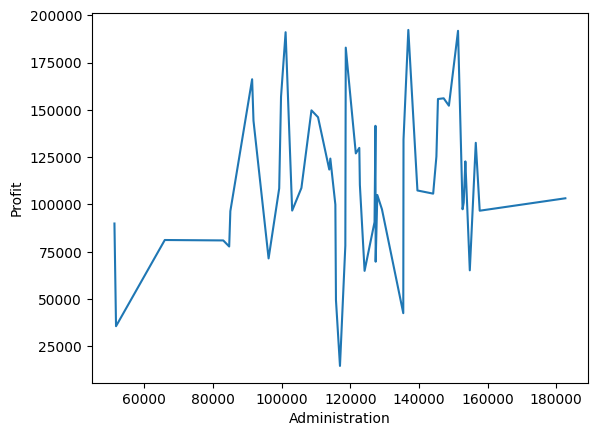

In [58]:
sns.lineplot(x = df["Administration"], y=df["Profit"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\227795954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df["Administration"])


<Axes: ylabel='Density'>

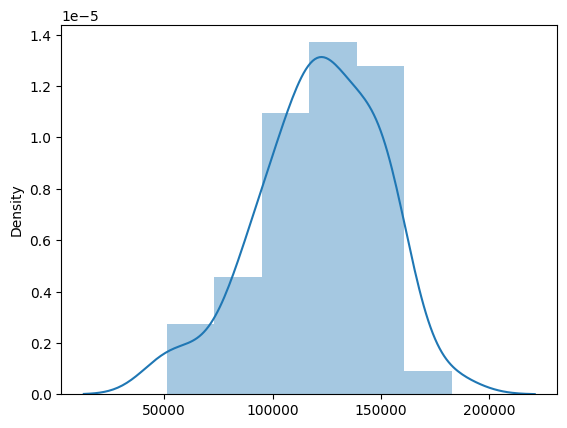

In [61]:
sns.distplot(x = df["Administration"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\2061219066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Marketing Spend"])


<Axes: xlabel='Marketing Spend', ylabel='Density'>

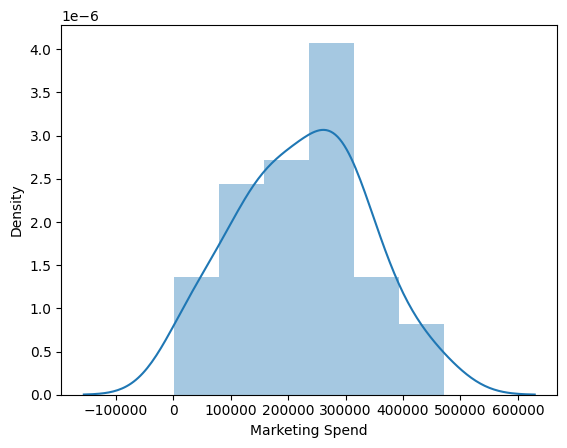

In [ ]:
sns.distplot(df["Marketing Spend"] )

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\1867386733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["R&D Spend"] )


<Axes: xlabel='R&D Spend', ylabel='Density'>

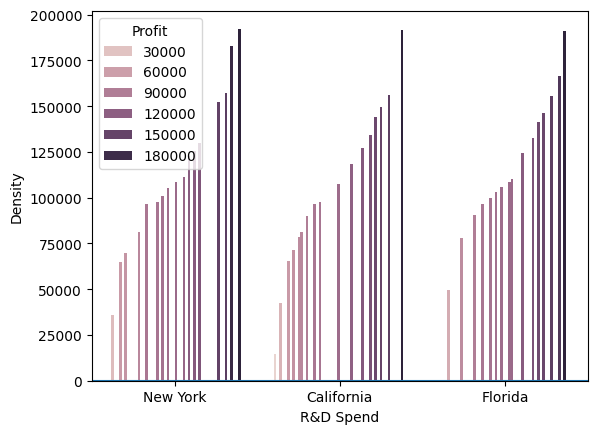

In [108]:
sns.distplot(df["R&D Spend"] )
sns.barplot(x=df.State, y= df.Profit, hue=df["Profit"])


### imputing values

In [67]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [66]:
kn = KNNImputer(n_neighbors=5, weights="distance", add_indicator=True)
Ii = IterativeImputer(tol = 0.001, n_nearest_features=10, add_indicator=True)

In [73]:
trf1 = ColumnTransformer([("knn_imputer", kn, [0, 1, 2])], remainder="passthrough")
trf2 = ColumnTransformer([("Ii_imputer", Ii, [0, 1, 2])], remainder="passthrough")


In [91]:
trf3 = ColumnTransformer([("Scaling", StandardScaler(with_mean=True, with_std=True), [0, 1, 2]),
                          ("Encoding", OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), [3]),
                          ])

In [92]:
lr = LinearRegression()

In [101]:
pipe = Pipeline([("imputer",trf2 ), ("prepros", trf3), ("model", lr)])

In [102]:
pipe.fit(Xtrain, Ytrain)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('prepros', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Ii_imputer', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [103]:
pred = pipe.predict(Xtest)

In [104]:
r2_score(Ytest, pred)
# mean_absolute_error(Ytest, pred)

0.9142815092461878

In [107]:
np.mean(cross_val_score(pipe, X, Y, cv = 5, scoring="r2"))

-0.5961645944840176